# **Basic**

#### 1. Jelaskan mengapa proses matching perlu dilakukan ketika ingin mengukur dampak dari suatu treatment pada propensity score modeling?

**Answer:**

Salah satu hal yang perlu concern lebih dalam saat melakukan PSM adalah confounder. Confounder adalah satu atau lebih variabel yang dapat memberikan impact terhadap semua grup (treatment maupun control). Jika kita ingin mengukur efek dari sebuah treatment , maka perlu adanya sample yang identik secara variabel diluar treatment. Apabila sample yang digunakan sudah identik, maka confounder tidak akan memiliki impact terhadap hasil output yang akan dicari. Jika kita tidak melakukan matching terlebih dulu, ada kemungkinan hasil output yang kita dapat tidak bisa digunakan karena bisa jadi hasil itu dipengaruhi tidak hanya oleh treatment melainkan juga dipengaruhi oleh confounder.

[Source : Matching Definition on statistic by Wikipedia](https://en.wikipedia.org/wiki/Matching_(statistics))

#### 2. Sebelum adanya Double ML, peneliti machine learning menggunakan metode Double Selection untuk menguji efek dari treatment. Namun pada akhirnya Double Machine Learning digunakan karena lebih baik dibandingkan dengan Double Selection. Jelaskan mengapa Double ML lebih baik digunakan ketimbang Double Selection? Masalah apa yang ada pada Double Selection yang dapat diselesaikan dengan Double ML?

**Answer:**
Double Selection mempunyai kekurangan ya itu terkadang, apabila ditemukan variable yang memiliki korelasi besar, double selection akan cenderung mengesampingkan variabel tersebut untuk menghindari bias. Sehingga apabila variabel tersebut secara kebetulan adalah variabel treatment, maka kita tidak bisa mengetahui dampak dari treatment tersebut terhadap hasil outcome (dengan kata lain fokus terhadap optimasi terhadap hasil prediksi). DoubleML digunakan untuk mengatasi hal tersebut dengan cara melakukan dua kali permodelan. Stage pertama mencari outcome langsung dari confounder dan kemudian mencari outcome setelah treatment. Kemudian stage selanjutnya model akan melakukan fitting confounder serta treatment, menggunakan hasil prediksi. Dari situlah kita akan mengukur dampak kausal dari data.

[Source 1 : Double Machine Learning for causal inference](https://towardsdatascience.com/double-machine-learning-for-causal-inference-78e0c6111f9d#:~:text=Double%20Machine%20Learning%20aims%20to,by%20means%20of%20cross%2Dfitting.)


[Source 2 : How to Use Machine Learning to Accelerate AB Testing](https://medium.com/teconomics-blog/using-ml-to-resolve-experiments-faster-bd8053ff602e)

#### 3. Ada banyak metrik yang dapat digunakan untuk mengukur dampak dari suatu variabel: ATE, CATE, dan LATE. Jelaskan kapan masing-masing metrik digunakan!

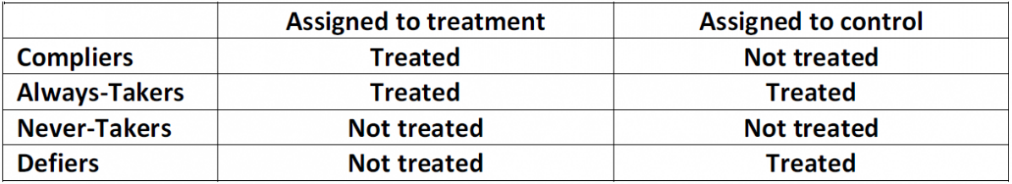

**Answer:**
ATE adalah metrics yang digunakan untuk mengukur dampak treatment (secara rata-rata) terhadap data secara menyeluruh. Sehingga ukuran yang digunakan adalah ukuran treatment terhadap populasi. CATE tidak jauh berbeda, hanya saja pada CATE, populasi yang digunakan memiliki kondisi atau "membership" tertentu (contoh berdasarkan gender, tinggi badan, warna, dsb yang bisa digunakan untuk mengelompokkan populasi menjadi lebih sempit). Take it to another level, LATE adalah metrics yang lebih kompleks dimana pengelompokkan populasi dijalankan menggunakan respon dari populasi terhadap treatment. Pada tabel diatas ditunjukkan berbagai macam pengelompokkan berdasarkan respon dari populasi terhadap treatment. LATE sendiri digunakan jika dan hanya jika sebuah populasi di assign sebagai treatment group dan mereka menerima treatment tersebut. Apabila sebaliknya (populasi di assign ke treatment grup, tetapi pada akhirnya tidak mendapat treatment) maka kita menggunakan ITT.

[Source : 10 Things to Know About the Local Average Treatment Effect](https://egap.org/resource/10-things-to-know-about-the-local-average-treatment-effect/)

#### 4. Berikut adalah pertanyaan open-ended, akan dinilai berdasarkan argumentasi yang memiliki landasan. Kita dapat mengekstrak knowledge dari model dengan menggunakan interpretable machine learning. Namun kita juga dapat menggunakan metode seperti double ML untuk mendapatkan pola sebab-akibat berdasarkan data generation process. Mana metode yang lebih baik untuk menjelaskan dampak dari akibat? Kapan metode interpretable machine learning dapat digunakan untuk analisis kausal?

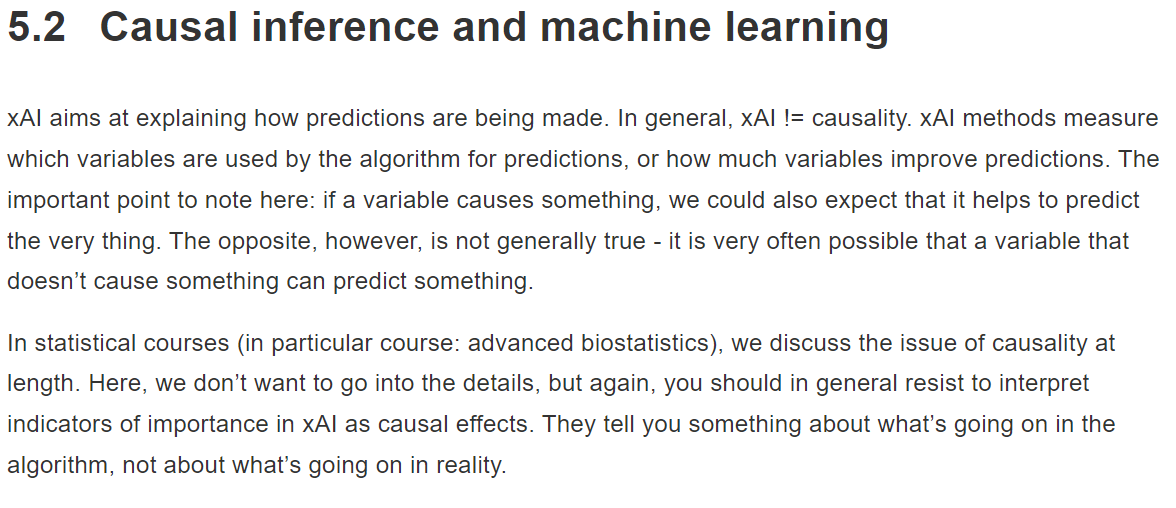

**Answer:**

Secara umum, interpretable machine learning berbeda dengan causality. Pada interpretable machine learning, kita dapat mengetahui **dampak sebuah variabel terhadap prediksi dalam algorithms** bukan dampat variabel tersebut dalam realita yang terjadi. Sehingga dalam hal ini, double ML lebih baik karena analisis di double ML dapat memberikan knowledge bagaimana impact sebuah variabel terhadap outcome yang terjadi (seperti contoh kita dapat mengetahui impact treatment penggunaan voucher terhadap peningkatan sales yang terjadi). Namun, interpretable machine learning pun bisa mendekati analisis kausal apabila **variabel confounder telah direkayasa terlebih dahulu**. Sehingga variabel confounder memiliki nilai yang sama pada treatment dan control grup dan tidak mempengaruhi outcome prediksi yang dihasilkan oleh machine learning.

[Source : Causal inference on static data](https://theoreticalecology.github.io/machinelearning/interpretation-and-causality-with-machine-learning.html#causal-inference-and-machine-learning)

# **Advance**

## Load Data & Profilling

In [1]:
!pip install psmpy
!pip install pycausalimpact
!pip install econml

In [2]:
# load data wrangling package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split

# statsmodels for linear/logistic regression and Granger causality test
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

# psmpy for propensity score modeling and plotting
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

# causalimpact for intervention analysis
from causalimpact import CausalImpact

# scikit learn
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

# econml
from econml.dml import DML
from econml.metalearners import TLearner, SLearner, XLearner

np.random.seed(1000)

In [3]:
gm_df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv")

In [4]:
gm_df.head(10)

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
5,76,1,0.009607,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
6,76,1,1.743033,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
7,76,1,0.953294,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
8,76,1,2.367780,6,5,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
9,76,1,1.264409,6,4,1,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757


In [5]:
gm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


The data have 10391 rows & 13 columns. Also there aren't any null on the data we used.

From meta data, the description on each columns is :
* schoolid: identifier of the student’s school;
* achievement_score : achievement scores reported for each students;
* success_expect: self-reported expectations for success in the future, a proxy for prior achievement, measured prior to random assignment;
* ethnicity: categorical variable for student race/ethnicity;
* gender: categorical variable for student identified gender;
* frst_in_family: categorical variable for student first-generation status, i.e. first in family to go to college;
* school_urbanicity: school-level categorical variable for urbanicity of the school, i.e. rural, suburban, etc;
* school_mindset: school-level mean of students’ fixed mindsets, reported prior to random assignment, standardized;
* school_achievement: school achievement level, as measured by test scores and college preparation for the previous 4 cohorts of students, standardized;
* school_ethnic_minority: school racial/ethnic minority composition, i.e., percentage of student body that is Black, Latino, or Native American, standardized;
* school_poverty: school poverty concentration, i.e., percentage of students who are from families whose incomes fall below the federal poverty line, standardized;
* school_size: total number of students in all four grade levels in the school, standardized.
* Intervention: is student schooled about “growth mindset”? 1 for yes

In [6]:
# Unique value for object column
for col in gm_df.columns:
    print("="*80)
    print(f"Column: {col}")
    print(gm_df[col].unique())

Column: schoolid
[76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53
 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29
 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5
  4  3  2  1]
Column: intervention
[1 0]
Column: achievement_score
[ 0.27735862 -0.44964639  0.76970344 ...  0.37082009 -0.39629671
  0.47897006]
Column: success_expect
[6 4 7 5 3 1 2]
Column: ethnicity
[ 4 12  5  1  2 14 15 10  6  9  8  7 11  3 13]
Column: gender
[2 1]
Column: frst_in_family
[1 0]
Column: school_urbanicity
[4 3 1 0 2]
Column: school_mindset
[ 0.33454352  0.99162827  0.98398211 -0.46294452  0.4204414  -3.08878982
  0.98824178 -0.05057947 -0.03439241 -1.11533652  1.02177695 -0.95397163
 -0.35420731 -1.29411031 -1.13224131 -1.16814528  0.92418344  0.20834922
 -0.61788794  0.09716239  1.18151615  1.93658085  0.25531863  0.999101
  0.19760784 -1.0362246   0.2113852   0.92542289  0.17342362 -1.23927231
  1.09941932  0.21400211  0.6184636  -0.

In [7]:
gm_df.groupby('intervention').agg({
    'schoolid': 'count',
    'achievement_score': 'mean'
}).rename(columns={
    'schoolid': 'Total Student',
    'achievement_score': 'Average Achievement Score'
})

,Total Student,Average Achievement Score
intervention,,
0,7007,-0.153803
1,3384,0.318469


From data above we found that the data have imbalance case with ratio intervention & no is `32.5` : `67.5`.

## Modelling

From the meta data analysis, we decide to go for this formation :
* Covariate (X) :

  1. `school_urbancity` : for many case, school environtment can affect the achievement of the students. For example, the student with quiet and nice environtment can get more concentrate when study that student that live on noisy environtment.
  2. `school_mindset` : the wise word said *you reap what you sow*, in which mean school methods and mindset in teaching students will affect on their study style. The school that know how to make study seems fun will make the students curiosity raise and get addicted to study than the school with strict style and sometimes will make student got depressed.
  3. `school_size` : it doesn't affect the student inside but sometimes affect them outside. The school with bigger size will have less competition because the ranking system will be bigger than the smaller school in which student with easily get monitored. Also sometimes the bigger school will have ranking system slightly different than the smaller ones.
  4. `school_poverty` : not a secret that school with high funding system will have better access to intellectual asset more than scholl that didn't.

* Treatment (T) : `intervention`, this because we want to know how the impact of *growth mindset* seminar for raise students achivement. In which there are a group chosen to attend the seminar and not. So it will be perfect variable for Treatment

* Response (Y) : `achievement_score`, the reason is simply because it's the more fit variable if we want to know if the seminar take an impact to each students. We didn't use `school_achievement` column because this column measure the achievement for each schools, not each students.

Also, from further analysis we found that :

1. Treatment type is **categorical**
2. Treatment type could be strong impact to the outcome
3. We have **imbalanced** case on the treatment group
4. We want to measure the effect of treatment to every unit

Therefore, the best model for this causal analysis is **Meta-Learners**

In [8]:
# outcome
y = "achievement_score"
# treatment
T = "intervention"
# covariates
X = ["school_urbanicity", "school_mindset", "school_size", "school_poverty"]

In [9]:
# train-test-split

# split data to train and test data
# where 30% of churn_data are test data
X_gm = gm_df.drop(['achievement_score'], axis=1)
y_gm = gm_df['achievement_score']
X_train, X_test, y_train, y_test = train_test_split(
    X_gm,
    y_gm, 
    test_size=0.3,
    stratify = X_gm['intervention'],
    random_state = 1000
)

In [10]:
# Make a new dataframe using train & test data
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

### S Learner

In [11]:
# define gradient boosting regression as S-Learner model
overall_model = GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state = 1000)
s_learner = SLearner(overall_model = overall_model)
# fit learner to data
s_learner.fit(Y = train_df[y], T = train_df[T], X = train_df[X])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [12]:
# Estimate treatment effects on test data
s_te = s_learner.effect(test_df[X])

In [13]:
# measure average treatment
np.mean(s_te)

The impact of treatment on the S Learner is positive 0.4683.

### T Learner

In [14]:
# define decision tree regression as T-Learner model
models = DecisionTreeRegressor(max_depth=6, random_state = 1000)
T_learner = TLearner(models=models)
# fit learner to data
T_learner.fit(Y = train_df[y], T = train_df[T], X = train_df[X])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [15]:
# Estimate treatment effects on test data
T_te = T_learner.effect(test_df[X])

In [16]:
# measure average treatment
np.mean(T_te)

The impact of treatment on the S Learner is positive 0.4746.

### X Learner

In [17]:
# Define X-learner
models = DecisionTreeRegressor(max_depth=6, random_state = 1000)
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state = 1000)
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Fit learner to data
X_learner.fit(Y = train_df[y], T = train_df[T], X = train_df[X])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [18]:
# Estimate treatment effects on test data
X_te = X_learner.effect(test_df[X])

In [19]:
# measure average treatment
np.mean(X_te)

The impact of treatment on the X Learner is positive 0.4698.

## Model Evaluation

In [20]:
# Make a dataframe using effect of the models

S_learner_df = pd.DataFrame({"model":"S-learner", "treatment_effect": s_te})
T_learner_df = pd.DataFrame({"model":"T-learner", "treatment_effect": T_te})
X_learner_df = pd.DataFrame({"model":"X-learner", "treatment_effect": X_te})

In [21]:
# Unite all of the dataframe
all_treatment_effect = pd.concat([S_learner_df, T_learner_df, X_learner_df])
all_treatment_effect

,model,treatment_effect
0,S-learner,0.550165
1,S-learner,0.570075
2,S-learner,0.607233
3,S-learner,1.047519
4,S-learner,0.807311
...,...,...
3113,X-learner,0.589469
3114,X-learner,0.469431
3115,X-learner,0.362338
3116,X-learner,0.478665


In [22]:
# Summary average treatment
print("S Learner Average Treatment Effect is", np.mean(s_te))
print("T Learner Average Treatment Effect is", np.mean(T_te))
print("X Learner Average Treatment Effect is", np.mean(X_te))

S Learner Average Treatment Effect is 0.4683551084480523
T Learner Average Treatment Effect is 0.474609991787639
X Learner Average Treatment Effect is 0.4698817173768227


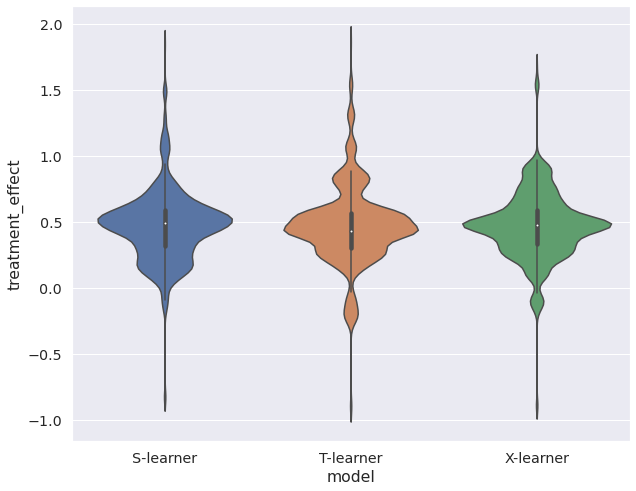

In [23]:
# Find the best learner using violin plot
sns.violinplot(x = "model", y = "treatment_effect", data = all_treatment_effect);

From the plot above, the S Learner and X Learner have narrowest distribution. So we decide to use **X Learner**, in which also can handle the imbalanced from out dataset.

## Compare with DML

In [24]:
# define DML Object
dml_est = DML(
    model_y = GradientBoostingRegressor(n_estimators=100),
    model_t = GradientBoostingRegressor(n_estimators=100),
    model_final = LinearRegression(fit_intercept=False),
    random_state = 1000
)

In [26]:
# fit estimator to train data
dml_est.fit(train_df[y], T = train_df[T], X = train_df[X], inference="bootstrap")

In [30]:
dml_est.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
school_urbanicity,-0.024,0.02,-1.208,0.17,-0.055,0.018
school_mindset,-0.108,0.03,-3.616,0.0,-0.168,-0.054
school_size,-0.043,0.032,-1.339,0.16,-0.088,0.025
school_poverty,0.06,0.027,2.261,0.0,0.016,0.117
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,0.519,0.059,8.85,0.0,0.384,0.605


In [27]:
# Get treatment effect and its confidence interval
te_pred = dml_est.effect(test_df[X])
# te_pred_interval = dml_est.effect_interval(ice_cream_test[X])

In [28]:
# Measure price effect
np.mean(te_pred)

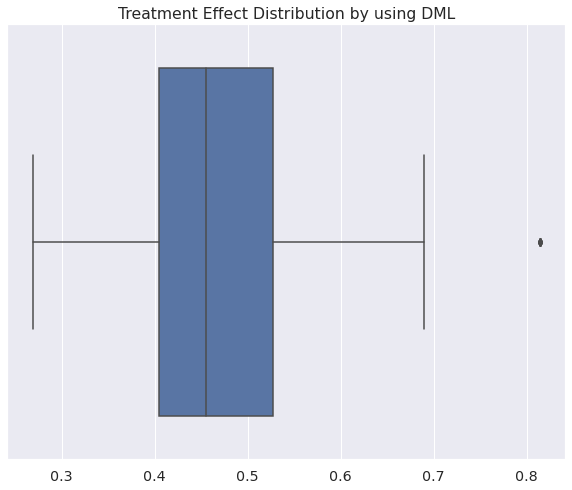

In [29]:
# check treatment effect distribution
sns.boxplot(x = te_pred).set_title("Treatment Effect Distribution by using DML");

## Recommendation

After doing causal impact analysis on the data. We know that the better model to use on this case is **Meta-learner** (with best learner is **X-Learner**) considered the characteristic of the confounder, treatment, and expected outcome that we use. However, this model have a weakness that the Meta-learner is also a "blackbox" in term of statistical. Then we tried to compare the result with DoubleML and we found that there are two confounder that didn't really effective to the data (p value > 0.05) which is `school_urbanicity` and `school_size`. So the recommendation as the outcome for this analysis is :

* If we try to go on with the Meta-learner, we better come with better confounder for outcome. Which means we need to do further research about school characteristic to find another variables. Or we could simply using two high impact (p value < 0.05) to determine the treatment impact towards outcome.

* We need to try some other methods like using domain knowledge feature engineering or using more simple models to match our needs to determine impact of seminar to the student achievement.